In [1]:
#Install libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import data file

data=pd.read_csv("/content/Wholesale customers data.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
#Checking missing values

data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# Checking datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [9]:
x=data

In [11]:
from sklearn.cluster import KMeans

In [17]:
# Find wcss

wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [18]:
wcss

[157595857524.96133,
 113217528878.79834,
 80342167254.53632,
 64855545845.90139,
 52928149261.51565,
 47205806739.53834,
 41232579199.207985,
 36138984441.85186,
 32978645721.05992,
 29954788799.65892]

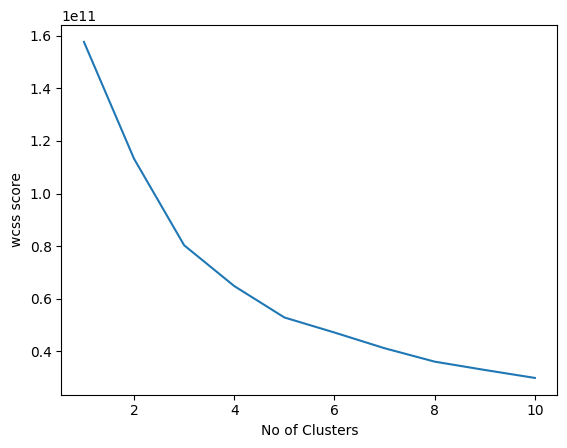

In [19]:
# Graph of wcss

plt.plot(range(1,11),wcss)
plt.xlabel("No of Clusters")
plt.ylabel("wcss score")
plt.show()

In [21]:
# No of cluster selected as 5

km=KMeans(n_clusters=5,n_init=20)
km.fit(x)

KMeans(n_clusters=5, n_init=20)

In [22]:
# Cluster Labels

cluster_labels=km.predict(x)

In [23]:
cluster_labels

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 3, 3, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 2, 3, 3, 1, 3, 2, 4, 3, 1, 3, 3, 1, 1, 3, 2, 2, 4, 3, 3, 2, 2,
       1, 2, 2, 0, 1, 2, 1, 1, 4, 2, 3, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0,
       1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1, 3, 1, 0, 0, 4,
       1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 4, 3, 3, 1, 2, 1, 2,
       1, 2, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 4, 4, 3, 3, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 1, 3, 2, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 2, 2, 3, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       4, 1, 1, 1, 1, 4, 2, 4, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 3, 3, 1,
       1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 3, 0, 1, 1, 2, 2, 2, 3, 2, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 4, 3, 3,
       3, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 1, 4, 4, 1, 1, 3, 1,
       2, 2, 2, 3, 2, 3, 1, 1, 1, 4, 1, 1, 3, 1, 1, 3, 1, 1, 4, 3, 4, 4,
       1, 3, 3, 4, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 3,

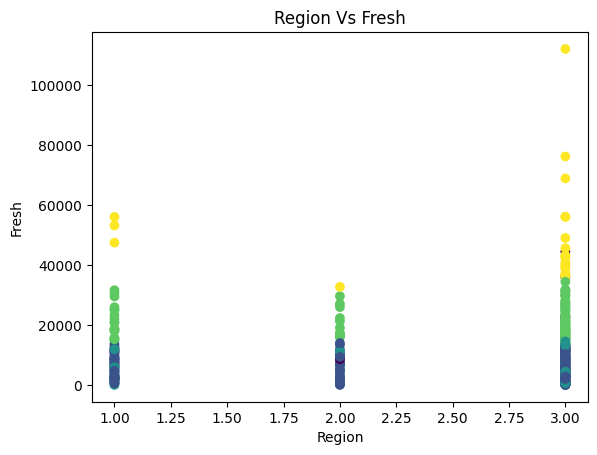

In [26]:
plt.scatter(x['Region'],x['Fresh'],c=cluster_labels)
plt.xlabel("Region")
plt.ylabel("Fresh")
plt.title('Region Vs Fresh')
plt.show()

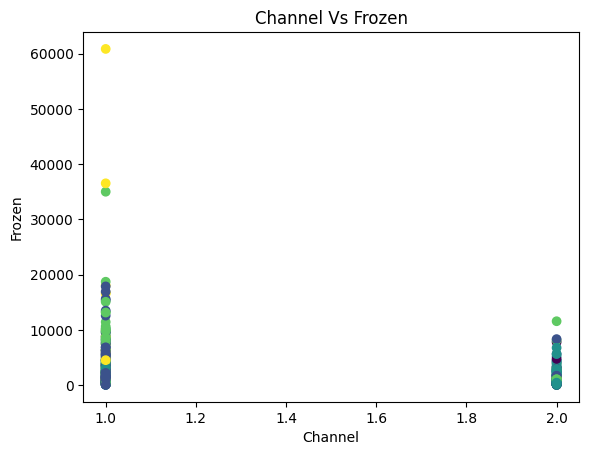

In [28]:
plt.scatter(x['Channel'],x['Frozen'],c=cluster_labels)
plt.xlabel("Channel")
plt.ylabel("Frozen")
plt.title('Channel Vs Frozen')
plt.show()

In [29]:
# Agglomerative Clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [30]:
mergings=linkage(x,method='ward')


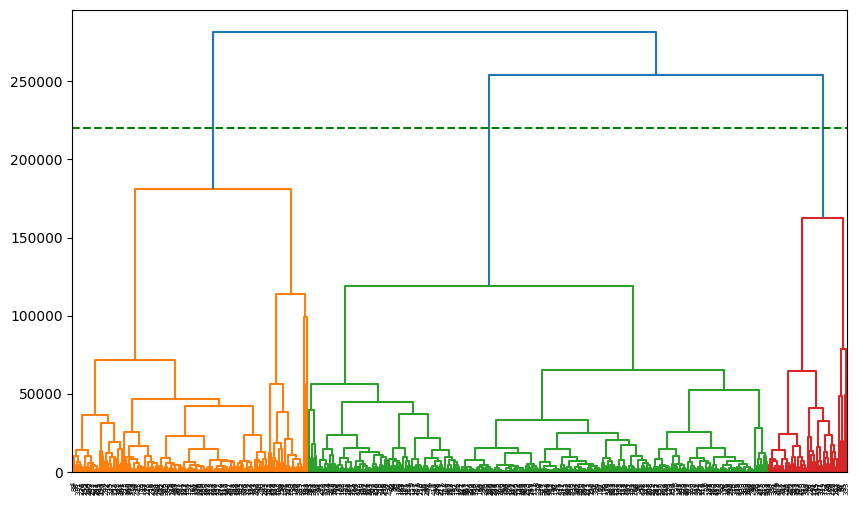

In [32]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(220000,color='green',linestyle='--')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
y_hc

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,

In [38]:
# Silhoutte Score

from sklearn.metrics import silhouette_score
silh_avg_kmeans=silhouette_score(x,cluster_labels)
print(silh_avg_kmeans)

0.37002161265079536


In [39]:
from sklearn.metrics import silhouette_score
silh_avg_kmeans=silhouette_score(x,y_hc)
print(silh_avg_kmeans)

0.3750155190004844


In [41]:
# Principal Component Analysis (PCA)

from sklearn.preprocessing import scale
scale(x)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [42]:
X=pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [43]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [44]:
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [45]:
from sklearn.decomposition import PCA

In [46]:
pc=PCA()
pc_array=pc.fit_transform(X)
pc_array.shape

(440, 8)

In [52]:
# Reducing the Components
pc=PCA(n_components=5)
pc_array=pc.fit_transform(X)
pc_array.shape


(440, 5)

In [53]:
pc_data=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5'])

In [54]:
pc_data.head()

,pc1,pc2,pc3,pc4,pc5
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458
2,1.269141,0.682055,-0.664095,1.634953,-1.193813
3,-1.056782,0.610821,-0.505654,0.196005,0.457855
4,0.634030,0.974199,-0.771209,0.186374,-0.813877


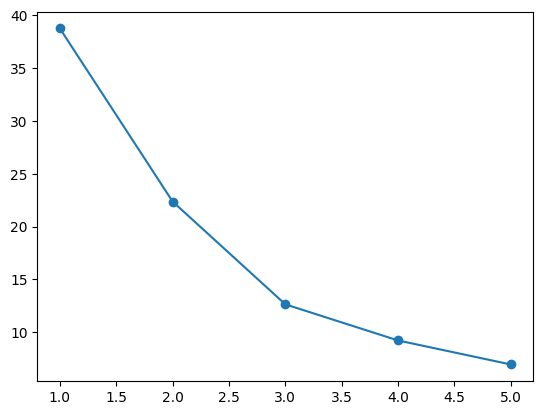

In [56]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],pc.explained_variance_ratio_*100,"-o")
plt.show()

In [ ]:
# Principal component 1 gives highest variance followed by 2,3 and 4
# Principal component 6 gives lowest variance